In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df=pd.read_csv('/content/drive/MyDrive/data science/insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [4]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [5]:
df.tail()

,age,bought_insurance
22,40,1
23,45,1
24,50,1
25,54,1
26,23,0


In [6]:
df.describe()

,age,bought_insurance
count,27.000000,27.000000
mean,39.666667,0.518519
std,15.745573,0.509175
min,18.000000,0.000000
25%,25.000000,0.000000
50%,45.000000,1.000000
75%,54.500000,1.000000
max,62.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               27 non-null     int64
 1   bought_insurance  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [8]:
df.columns

Index(['age', 'bought_insurance'], dtype='object')

In [9]:
df.shape

(27, 2)

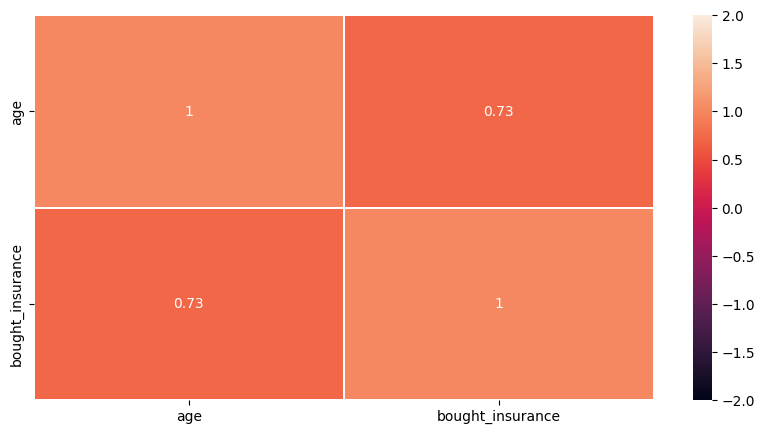

In [10]:
core=df.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(core,vmin=-2,vmax=2,annot=True,linewidths=0.2)
plt.show()

In [11]:
y=df['bought_insurance']
x=df.drop(['bought_insurance'],axis=1)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45,test_size=0.25)

In [14]:
x_test

,age
10,18
22,40
26,23
16,25
13,29
24,50
7,60


In [15]:
y_test

10    0
22    1
26    0
16    1
13    0
24    1
7     1
Name: bought_insurance, dtype: int64

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
model = rf.fit(x_train,y_train)

In [17]:
pre=model.predict(x_test)
pre

array([0, 1, 0, 0, 0, 1, 1])

In [18]:
print(y_test)

10    0
22    1
26    0
16    1
13    0
24    1
7     1
Name: bought_insurance, dtype: int64


In [19]:
print(pre)

[0 1 0 0 0 1 1]


In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
print('mcs is:',mean_squared_error(y_test,pre))

mcs is: 0.14285714285714285


In [22]:
x=int(input('enter a prediction age '))
a=pd.Series(x)
b=pd.DataFrame(a)
pre=model.predict(b)
print(pre)
if pre==0:
  print('you are not eligible for insurance')
else:
  print('you are eligible ')

enter a prediction age 21
[0]
you are not eligible for insurance


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
